### 3 Naive Bayes Classifer 

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
import numpy as np

# Cargar los datos
delays_df = pd.read_csv("FlightDelays.csv")
delays_df.info()
delays_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CRS_DEP_TIME   2201 non-null   int64 
 1   CARRIER        2201 non-null   object
 2   DEP_TIME       2201 non-null   int64 
 3   DEST           2201 non-null   object
 4   DISTANCE       2201 non-null   int64 
 5   FL_DATE        2201 non-null   object
 6   FL_NUM         2201 non-null   int64 
 7   ORIGIN         2201 non-null   object
 8   Weather        2201 non-null   int64 
 9   DAY_WEEK       2201 non-null   int64 
 10  DAY_OF_MONTH   2201 non-null   int64 
 11  TAIL_NUM       2201 non-null   object
 12  Flight Status  2201 non-null   object
dtypes: int64(7), object(6)
memory usage: 223.7+ KB


,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [44]:
# Limpiar los datos
delays_df = delays_df.dropna()
delays_df = delays_df.drop_duplicates()
delays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CRS_DEP_TIME   2201 non-null   int64 
 1   CARRIER        2201 non-null   object
 2   DEP_TIME       2201 non-null   int64 
 3   DEST           2201 non-null   object
 4   DISTANCE       2201 non-null   int64 
 5   FL_DATE        2201 non-null   object
 6   FL_NUM         2201 non-null   int64 
 7   ORIGIN         2201 non-null   object
 8   Weather        2201 non-null   int64 
 9   DAY_WEEK       2201 non-null   int64 
 10  DAY_OF_MONTH   2201 non-null   int64 
 11  TAIL_NUM       2201 non-null   object
 12  Flight Status  2201 non-null   object
dtypes: int64(7), object(6)
memory usage: 223.7+ KB


In [45]:
# Convertir variables numéricas a categóricas
delays_df['DAY_WEEK'] = delays_df['DAY_WEEK'].astype('category')
delays_df['DEP_TIME'] = delays_df['DEP_TIME'].astype('category')

#Poner niveles a las variables categóricas que el 1 sea lunes hasta el 7 que sea domingo
delays_df['DAY_WEEK'] = delays_df['DAY_WEEK'].cat.rename_categories(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

# Crear grupos horarios para la hora de salida programada
delays_df['CRS_DEP_TIME'] = (delays_df['CRS_DEP_TIME'] / 100).round().astype('category')

delays_df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,15.0,OH,1455,JFK,184,01/01/2004,5935,BWI,0,Jueves,1,N940CA,ontime
1,16.0,DH,1640,JFK,213,01/01/2004,6155,DCA,0,Jueves,1,N405FJ,ontime
2,12.0,DH,1245,LGA,229,01/01/2004,7208,IAD,0,Jueves,1,N695BR,ontime
3,17.0,DH,1709,LGA,229,01/01/2004,7215,IAD,0,Jueves,1,N662BR,ontime
4,10.0,DH,1035,LGA,229,01/01/2004,7792,IAD,0,Jueves,1,N698BR,ontime


In [ ]:
# Configuración inicial
TARGET = 'Flight Status'
FEATURES = ['CRS_DEP_TIME', 'DEST', 'ORIGIN', 'DAY_WEEK']
df = delays_df[FEATURES + [TARGET]].copy()

# División train/validation
train_df, valid_df = train_test_split(df, train_size=0.6, random_state=1)

# Preparación de datos
X_train = train_df[FEATURES].astype('category').apply(lambda x: x.cat.codes)
y_train = train_df[TARGET].astype('category').cat.codes

# Entrenamiento del modelo
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)

# Información de clases y características
classes = train_df[TARGET].astype('category').cat.categories
features = FEATURES

# Resultados compactos
print("\nProbabilidades a priori:")
print(pd.Series(np.exp(nb_model.class_log_prior_), index=classes).round(4))

print("\nProbabilidades condicionales:")
for i, feat in enumerate(features):
    print(f"\n{feat}:")
    cats = train_df[feat].astype('category').cat.categories
    probs = np.exp(nb_model.feature_log_prob_[i])
    
    df_probs = pd.DataFrame(probs, 
                          index=classes, 
                          columns=[f"{feat}={c}" for c in cats])
    print(df_probs.round(4).to_string())


Probabilidades a priori:
delayed    0.1977
ontime     0.8023
dtype: float64

Probabilidades condicionales:

CRS_DEP_TIME:
         CRS_DEP_TIME=6.0  CRS_DEP_TIME=7.0  CRS_DEP_TIME=8.0  CRS_DEP_TIME=9.0  CRS_DEP_TIME=10.0  CRS_DEP_TIME=11.0  CRS_DEP_TIME=12.0  CRS_DEP_TIME=13.0  CRS_DEP_TIME=14.0  CRS_DEP_TIME=15.0  CRS_DEP_TIME=16.0  CRS_DEP_TIME=17.0  CRS_DEP_TIME=18.0  CRS_DEP_TIME=19.0  CRS_DEP_TIME=20.0  CRS_DEP_TIME=21.0
delayed            0.0361            0.0542            0.0650            0.0217             0.0325             0.0144             0.0505             0.0469             0.0397             0.1949             0.0722             0.1480             0.0217             0.0975             0.0181             0.0866
ontime             0.0623            0.0633            0.0847            0.0567             0.0521             0.0344             0.0660             0.0744             0.0577             0.1163             0.0772             0.0995             0.0353           

In [47]:
# Crear tabla de contingencia
contingency_table = pd.crosstab(train_df['Flight Status'], train_df['DEST'])
print("\nTabla de contingencia:")
print(contingency_table)

# Proporciones por fila 
prop_table_rows = contingency_table.div(contingency_table.sum(axis=1), axis=0).round(4)
print("\nProporciones por fila:")
print(prop_table_rows)

# Proporciones por columna
prop_table_cols = contingency_table.div(contingency_table.sum(axis=0), axis=1).round(4)
print("\nProporciones por columna:")
print(prop_table_cols)


Tabla de contingencia:
DEST           EWR  JFK  LGA
Flight Status               
delayed         99   52  110
ontime         282  165  612

Proporciones por fila:
DEST              EWR     JFK     LGA
Flight Status                        
delayed        0.3793  0.1992  0.4215
ontime         0.2663  0.1558  0.5779

Proporciones por columna:
DEST              EWR     JFK     LGA
Flight Status                        
delayed        0.2598  0.2396  0.1524
ontime         0.7402  0.7604  0.8476


In [48]:
# Preprocesar datos de validación (mismo tratamiento que entrenamiento)
X_valid = valid_df.drop('Flight Status', axis=1)
X_valid = X_valid.astype('category').apply(lambda col: col.cat.codes)

# Predecir probabilidades y clases
pred_prob = nb_model.predict_proba(X_valid)
pred_class = nb_model.predict(X_valid)

# Crear DataFrame con resultados
results_df = pd.DataFrame({
    'actual': valid_df['Flight Status'],
    'predicted': pd.Categorical.from_codes(pred_class, categories=nb_model.classes_),
    'prob retraso': pred_prob[:, 0],  # Probabilidad clase 0
    'prob tiempo': pred_prob[:, 1]   # Probabilidad clase 1
})

print("\nResultados de validación:")
print(results_df.head())



Resultados de validación:
      actual predicted  prob retraso  prob tiempo
1276  ontime         1      0.380874     0.619126
1446  ontime         1      0.062611     0.937389
335   ontime         1      0.134184     0.865816
1458  ontime         1      0.065996     0.934004
2038  ontime         1      0.058810     0.941190


In [49]:
# Filtrar registros específicos (ajusta los valores según tu caso)
filter_mask = (
    (valid_df['DAY_WEEK'] == 'Domingo') &  # Adjusted to match the categorical value
    (valid_df['CRS_DEP_TIME'] == 10) & 
    (valid_df['DEST'] == 'LGA') & 
    (valid_df['ORIGIN'] == 'DCA')
)

filtered_results = results_df[filter_mask]
print("\nResultados filtrados:")
print(filtered_results[['actual', 'predicted', 'prob retraso', 'prob tiempo']].head())


Resultados filtrados:
      actual predicted  prob retraso  prob tiempo
1225  ontime         1      0.120626     0.879374
1241  ontime         1      0.120626     0.879374


In [56]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Convertir las clases a strings (si son numéricas)
class_names = [str(cls) for cls in nb_model.classes_]

# Para entrenamiento
pred_class_train = nb_model.predict(X_train)
print("Matriz de confusión - Entrenamiento:")
print(confusion_matrix(y_train, pred_class_train))
print("\nReporte - Entrenamiento:")
print(classification_report(y_train, pred_class_train, target_names=class_names))

# Codificar X_valid
X_valid_encoded = X_valid.astype('category').apply(lambda col: col.cat.codes)

# Codificar y_valid
y_valid = valid_df[TARGET].astype('category').cat.codes

# Para validación
pred_class_valid = nb_model.predict(X_valid_encoded)
print("\nMatriz de confusión - Validación:")
print(confusion_matrix(y_valid, pred_class_valid))
print("\nReporte - Validación:")
print(classification_report(y_valid, pred_class_valid, target_names=class_names))

Matriz de confusión - Entrenamiento:
[[  26  235]
 [  28 1031]]

Reporte - Entrenamiento:
              precision    recall  f1-score   support

           0       0.48      0.10      0.17       261
           1       0.81      0.97      0.89      1059

    accuracy                           0.80      1320
   macro avg       0.65      0.54      0.53      1320
weighted avg       0.75      0.80      0.74      1320


Matriz de confusión - Validación:
[[ 13 154]
 [ 19 695]]

Reporte - Validación:
              precision    recall  f1-score   support

           0       0.41      0.08      0.13       167
           1       0.82      0.97      0.89       714

    accuracy                           0.80       881
   macro avg       0.61      0.53      0.51       881
weighted avg       0.74      0.80      0.75       881



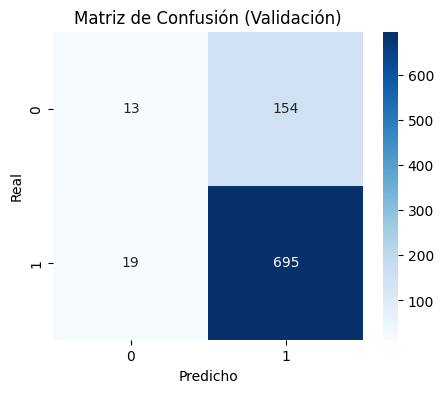

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=nb_model.classes_, 
                yticklabels=nb_model.classes_)
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.title(title)
    plt.show()

# Para validación
plot_confusion_matrix(y_valid, pred_class_valid, 'Matriz de Confusión (Validación)')

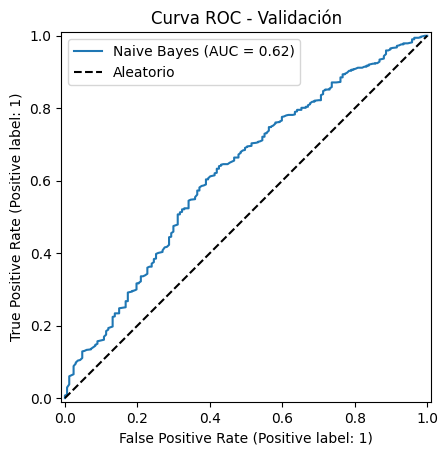

In [59]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(
    nb_model, 
    X_valid_encoded, 
    y_valid,
    name='Naive Bayes'
)
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio")
plt.legend()
plt.title('Curva ROC - Validación')
plt.show()

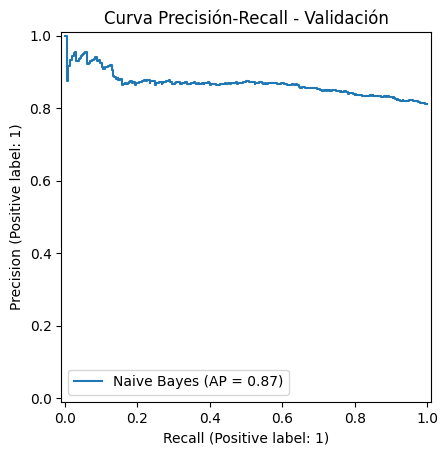

In [61]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(
    nb_model, 
    X_valid_encoded, 
    y_valid,
    name='Naive Bayes'
)
plt.title('Curva Precisión-Recall - Validación')
plt.show()